Report Code

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np
import torch
print("Packages successfully imported!")

Packages successfully imported!


First implementation: AND gate


In [ ]:
# Define our data for AND problem
input_data = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
output_data = torch.tensor([[0.], [0.], [0.], [1.]])
print(f"We have {input_data.size(0)} examples")
print(f"Input is size {input_data.size(1)} and output is size {output_data.size(1)}")

# Define our weights and biases (todo)
W = torch.tensor([[1.], [1.]])
b = torch.tensor([[-1.1]])
assert list(W.size()) == [2, 1], f"Weights are incorrect size ({W.size()})"
assert list(b.size()) == [1, 1], f"Biases are incorrect size ({b.size()})"

# Activation function
def f(inp):
    inp[inp >= 0] = 1
    inp[inp < 0] = 0
    return inp

# Loop over each example
for i in range(input_data.size(0)):
    # Get example `i` (and unsqueeze to [1, 2] and [1, 1])
    x = input_data[i].unsqueeze(0)
    y = output_data[i].unsqueeze(0)

    # Predict output 
    y_hat = f(torch.mm(x, W) + b)
    #f(torch.mm(torch.tensor([[1.],[1.]]),torch.tensor([[1.,1.]]))-1)

    # Check predictions are correct
    print(f"Prediction {y_hat}, desired output {y}")
    assert (y == y_hat), f"{y_hat} does not equal {y}"

print("Well done, your weights and biases are correct!")

We have 4 examples
Input is size 2 and output is size 1
Prediction tensor([[0.]]), desired output tensor([[0.]])
Prediction tensor([[0.]]), desired output tensor([[0.]])
Prediction tensor([[0.]]), desired output tensor([[0.]])
Prediction tensor([[1.]]), desired output tensor([[1.]])
Well done, your weights and biases are correct!


Second Implementation OR Gate 

In [ ]:
# Define our data for OR problem
input_data = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
output_data = torch.tensor([[0.], [1.], [1.], [1.]])

# Define our weights and biases (todo)
W = torch.tensor([[1.], [1.]])
b = torch.tensor([[-1]])
assert list(W.size()) == [2, 1], f"Weights are incorrect size ({W.size()})"
assert list(b.size()) == [1, 1], f"Biases are incorrect size ({b.size()})"

# Activation function
def f(inp):
    inp[inp >= 0] = 1
    inp[inp < 0] = 0 
    return inp

# Loop over each example
for i in range(input_data.size(0)):
    # Get example `i` (and unsqueeze to [1, 2] and [1, 1])
    x = input_data[i].unsqueeze(0)
    y = output_data[i].unsqueeze(0)

    # Predict output 
    y_hat = f(torch.mm(x, W) + b)

    # Check predictions are correct
    print(f"Prediction {y_hat}, desired output {y}")
    assert (y == y_hat), f"{y_hat} does not equal {y}"

print("Well done, your weights and biases are correct!")

Prediction tensor([[0.]]), desired output tensor([[0.]])
Prediction tensor([[1.]]), desired output tensor([[1.]])
Prediction tensor([[1.]]), desired output tensor([[1.]])
Prediction tensor([[1.]]), desired output tensor([[1.]])
Well done, your weights and biases are correct!


Third implementation: XOR Gate

In [22]:
# Provides extra neural network functions
import torch.nn as nn
# Provides optimizers
import torch.optim as optim

# number of epochs
num_epochs = 1000

# Define our data for XOR problem
input_data = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
output_data = torch.tensor([[0.], [1.], [1.], [0.]])

# Define weights & biases for first layer (todo)
W_1 = nn.Parameter(torch.rand(2, 3))# Inputs 2 outputs 3
b_1 = nn.Parameter(torch.rand(1, 3))#Bias needs 3 outputs
# Define weights & biases for second layer (todo)
W_2 = nn.Parameter(torch.rand(3, 2)) #second layer takes 3 inputs and 1 output
b_2 = nn.Parameter(torch.rand(1, 1)) #bias 1 input and 1 output
# Define weights & biases for third layer (todo)
W_3 = nn.Parameter(torch.rand(2, 3)) #second layer takes 3 inputs and 1 output
b_3 = nn.Parameter(torch.rand(3, 1)) #bias 1 input and 1 output

# Setup our loss function
loss_fn = nn.MSELoss()

# Setup our optimizer
optimizer = optim.SGD([W_1, W_2,W_3, b_1, b_2, b_3], lr=0.01)

# Define our predict function (todo)
def predict(x, W_1, W_2,W_3, b_1, b_2, b_3):
        h = torch.sigmoid(torch.mm(x, W_1) + b_1)
       # print(h.shape)
        h_2 = torch.sigmoid(torch.mm(h, W_2) + b_2)
       # print(h_2.shape)
        y_hat = torch.sigmoid(torch.mm(h_2, W_3) + b_3)
       # print(y_hat.shape)
        return y_hat

# Training loop
for epoch in range(num_epochs):
    for i in range(input_data.size(0)):
        # Get example `i` (and unsqueeze to [1, 2] and [1, 1])
        x = input_data[i].unsqueeze(0)
        y = output_data[i].unsqueeze(0)

        # Clear gradients (todo)
        optimizer.zero_grad()
        # Predict outputs (todo)
        y_hat = predict(x, W_1, W_2, W_3, b_1, b_2, b_3)
        # Calculate loss (todo)
        loss = loss_fn(y_hat, y)
        # Calculate gradients (todo)
        loss.backward()
        # Update weights (todo)
        optimizer.step()

    # Test our network
    if epoch % 1000 == 0:
        print(f"Testing network @ epoch {epoch}")
        for i in range(input_data.size(0)):
            # Make a prediction
            x = input_data[i].unsqueeze(0)
            y = output_data[i].unsqueeze(0)
            y_hat = predict(x,W_1, W_2, W_3, b_1, b_2, b_3)
            # Print result
            print("Input:{} Target: {} Predicted:[{}] Error:[{}]".format(
                x.data.numpy(),
                y.data.numpy(),
                np.round(y_hat.data.numpy(), 4),
                np.round(y.data.numpy() - y_hat.data.numpy(), 4)
            ))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([3, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Testing network @ epoch 0
Input:[[0. 0.]] Target: [[0.]] Predicted:[[[0.827  0.9021 0.8103]
 [0.7266 0.8366 0.7037]
 [0.7367 0.8435 0.7143]]] Error:[[[-0.827  -0.9021 -0.8103]
 [-0.7266 -0.8366 -0.7037]
 [-0.7367 -0.8435 -0.7143]]]
Input:[[0. 1.]] Target: [[1.]] Predicted:[[[0.8281 0.9033 0.8115]
 [0.7282 0.8386 0.7053]
 [0.7382 0.8454 0.7159]]] Error:[[[0.1719 0.0967 0.1885]
 [0.2718 0.1614 0.2947]
 [0.2618 0.1546 0.2841]]]
Input:[[1. 0.]] Target: [[1.]] Predicted:[[[0.8293 0.9046 0.8124]
 [0.7299 0.8405 0.7066]
 [0.7399 0.8473 0.7171]]] Error:[[[0.1707 0.0954 0.1876]
 [0.2701 0.1595 0.2934]
 [0.2601 0.1527 0.2829]]]
Input:[[1. 1.]] Target: [[0.]] Predicted:[[[0.8301 0.9054 0.8132]
 [0.7308 0.8418 0.7076]
 [0.7408 0.8485 0.7182]]] Error:[[[-0.8301 -0.9054 -0.8132]
 [-0.7308 -0.8418 -0.7076]
 [-0.7408 -0.8485 -0.7182]]]


In [27]:
# Provides extra neural network functions
import torch.nn as nn
# Provides optimizers
import torch.optim as optim

# number of epochs
num_epochs = 1000

# Define our data for XOR problem
input_data = torch.tensor([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
output_data = torch.tensor([[0.], [1.], [1.], [0.]])

# Define weights & biases for first layer (todo)
W_1 = nn.Parameter(torch.rand(2, 3))# Inputs 2 outputs 3
b_1 = nn.Parameter(torch.rand(1, 3))#Bias needs 3 outputs
# Define weights & biases for second layer (todo)
W_2 = nn.Parameter(torch.rand(3, 1)) #second layer takes 3 inputs and 1 output
b_2 = nn.Parameter(torch.rand(1, 1)) #bias 1 input and 1 output
# Define weights & biases for third layer (todo)
#W_3 = nn.Parameter(torch.rand(2, 3)) #second layer takes 3 inputs and 1 output
#b_3 = nn.Parameter(torch.rand(3, 1)) #bias 1 input and 1 output

# Setup our loss function
loss_fn = nn.MSELoss()

# Setup our optimizer
optimizer = optim.SGD([W_1, W_2, b_1, b_2], lr=0.01)

# Define our predict function (todo)
def predict(x, W_1, W_2,b_1, b_2):
        h = torch.sigmoid(torch.mm(x, W_1) + b_1)
       # print(h.shape)
        y_hat = torch.sigmoid(torch.mm(h, W_2) + b_2)
       # print(h_2.shape)
        #y_hat = torch.sigmoid(torch.mm(h_2, W_3) + b_3)
       # print(y_hat.shape)
        return y_hat

# Training loop
for epoch in range(num_epochs):
    for i in range(input_data.size(0)):
        # Get example `i` (and unsqueeze to [1, 2] and [1, 1])
        x = input_data[i].unsqueeze(0)
        y = output_data[i].unsqueeze(0)

        # Clear gradients (todo)
        optimizer.zero_grad()
        # Predict outputs (todo)
        y_hat = predict(x, W_1, W_2, b_1, b_2)
        # Calculate loss (todo)
        loss = loss_fn(y_hat, y)
        # Calculate gradients (todo)
        loss.backward()
        # Update weights (todo)
        optimizer.step()

    # Test our network
    if epoch % 1000 == 0:
        print(f"Testing network @ epoch {epoch}")
        for i in range(input_data.size(0)):
            # Make a prediction
            x = input_data[i].unsqueeze(0)
            y = output_data[i].unsqueeze(0)
            y_hat = predict(x,W_1, W_2, b_1, b_2,)
            # Print result
            print("Input:{} Target: {} Predicted:[{}] Error:[{}]".format(
                x.data.numpy(),
                y.data.numpy(),
                np.round(y_hat.data.numpy(), 4),
                np.round(y.data.numpy() - y_hat.data.numpy(), 4)
            ))

Testing network @ epoch 0
Input:[[0. 0.]] Target: [[0.]] Predicted:[[[0.8054]]] Error:[[[-0.8054]]]
Input:[[0. 1.]] Target: [[1.]] Predicted:[[[0.8179]]] Error:[[[0.1821]]]
Input:[[1. 0.]] Target: [[1.]] Predicted:[[[0.823]]] Error:[[[0.177]]]
Input:[[1. 1.]] Target: [[0.]] Predicted:[[[0.8321]]] Error:[[[-0.8321]]]


Fourth Implementation: Recurrent Neural Network (Sequence learning - backpropagation)

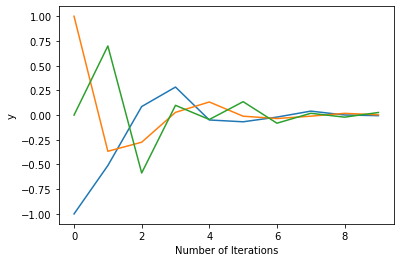

In [67]:
num_iterations = 10
num_nodes = 3

weights = torch.randn(num_nodes, num_nodes) * 0.4

# activations over time
x = torch.zeros(num_nodes, num_iterations)
# init conditions
x[0, 0] = -1
x[1, 0] = 1

# setup random input
conf = torch.tensor(np.random.choice([0, 1.0], size=(num_nodes)))
pulse_time = 10
pulse_dur = 10
mag = 3.0
impulse = 0

for t in range(1, num_iterations):
    # update activations
    x[:, t] = torch.tanh(weights @ x[:, t-1] + impulse)

    # set input
    if t > pulse_time and t < (pulse_time + pulse_dur):
        impulse = mag * conf
    else:
        impulse = 0

# plot
_, ax = plt.subplots(1, 1)
for n in range(num_nodes):
    ax.plot(range(num_iterations), x[n, :])
    ax.set_xlabel("Number of Iterations")
    ax.set_ylabel("y")

plt.savefig('plot1.png', format ="png", dpi=300, bbox_inches='tight')
plt.show()  


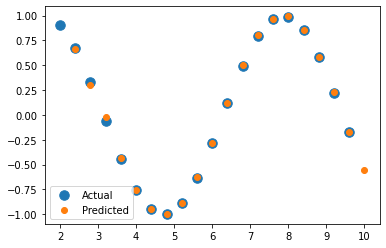

In [66]:
# Provides extra neural network functions
import torch.nn as nn
# Provides optimizers
import torch.optim as optim

# define constants
epochs = 300
hidden_size = 3
input_size = 1
output_size = 1
seq_len = 20

# Define our sin wave data
data_time_steps = np.linspace(2, 10, seq_len + 1)
data = np.sin(data_time_steps)

# define our sequence
x_data = torch.tensor(data[:-1]).float()
y_data = torch.tensor(data[1:]).float()

# Define our weights (todo)
W_1 = nn.Parameter(torch.rand(hidden_size + input_size, hidden_size)).float()
W_2 = nn.Parameter(torch.rand(hidden_size, output_size)).float()

# Setup our loss function
loss_fn = nn.MSELoss()

# Setup our optimizer
optimizer = optim.SGD([W_1, W_2], lr=0.01)

# Define our predict function (todo)
def predict(x, hidden, W_1, W_2):
    x_and_hidden = torch.cat((x, hidden), 1)
    hidden = torch.tanh(torch.mm(x_and_hidden, W_1))
    out = torch.mm(hidden, W_2)
    return out, hidden

# Training loop
for epoch in range(1000):
    optimizer.zero_grad()
    # init hidden state
    hidden = torch.zeros((1, hidden_size))
    loss = 0
    for t in range(x_data.size(0)):
        x_t = x_data[t].view(1, 1)
        y_t = y_data[t].view(1, 1)
        # predict next hidden and state
        (y_t_hat, hidden) = predict(x_t, hidden, W_1, W_2)
        # accumulate loss
        loss = loss + loss_fn(y_t_hat, y_t)
    loss.backward()
    optimizer.step()  

# Test network
hidden = torch.zeros((1, hidden_size))
predictions = []

for t in range(x_data.size(0)):
    x_t = x_data[t].view(-1, 1)
    (y_t_hat, hidden) = predict(x_t, hidden, W_1, W_2)
    predictions.append(y_t_hat.data.numpy().ravel()[0])


plt.scatter(data_time_steps[:-1], x_data.data.numpy(), s=90, label="Actual")
plt.scatter(data_time_steps[1:], predictions, label="Predicted")
plt.legend()

plt.show()  
        